### Regression
1) It is a predictive modeling technique which investigates the realtionship between dependent and independent variables(one or more) <br>
2) Dependent variable is continuous in nature eg - Sales, Weight, Profit, Revenue, Price etc<br>

3) <pre>
   y = depenedent varaible/output/target variable
   x = independent variable/input(s)
   </pre>

### Simple Linear Regression
1) It is a regression model that estimates the relationship between one independent variable and one dependent variable using a straight line.<br>
2) It has an equation of the form <b>y = ax + b or y = mx + c</b><br>

Where-<br>
x = independent variable/ input feature/input attribute/input column<br>
y = dependent variable / output feature/target attribute/ output column<br>
a/m = slope or coefficient or weight or how much we expect y to change as x changes       
b/c = intercept / constant / bias<br>

In this graph, x = Time spent Studying, y = Marks obtained. The orange dots are the corresponding data points. The blue line is the best fit line for Linear regression(y = mx +c)

<img src="reg1.png">

#### Best Fit Line
The Linear Regression model finds the best fit line that minimizes the squared error between the actual data points and its perpendicular dropped on the predicted line.<br>

SST = Total Sum of Squares <br>
SSE = Error/Residual Sum of squares <br>
SSR = Regression sum of squares<br>

<img src="reg2.png">

<img src="reg3.png">

#### R2 score (Coefficient of Determination or Goodness of Fit)

The coefficient of determination is the portion of the total variation in the dependent variable that is explained by variation in the independent variable

<img src="reg4.png">

<b>SST = SSE + SSR</b><br>
R2 score  = SSR/SST = (SST- SSE)/ SST = 1 – SSE/SST<br>
When SSE= 0, R2 score = 1 (Best case scenario)<br>
and when SSE = SST, R2 score = 0 (Worst case Scenario)



### Regression Metrics

<img src="reg5.png">

### Multiple Linear Regression

1)	Multiple linear regression is used to estimate the relationship between two or more independent variables and one dependent variable. <br>

2)	It has an equation of the form <b>y = a1x1 + a2x2 + a3x3 +…..+ anxn + b </b><br>
where:-<br>
x1 - xn = independent variables/ input features<br>
y = dependent variable / output feature<br>
a1,a2,....,an = coefficients/slope  corresponding to x1 - xn             
b = intercept / constant / bias<br>

3)	It is practically out of scope to represent multiple linear regression on a scatter chart with actual data points and a regression line as the scatter chart would have to span multiple dimensions corresponding to each independent variable and likewise the Regression line would also span across multiple dimensions<br>


#### Pros
1)Linear Regression performs well when the dataset is linearly separable

2)Linear Regression is easier to implement, interpret and efficient to train.

#### Cons
1) Main limitation of Linear Regression is the assumption of linearity between the dependent variable and the independent variables. In the real world, the data may not always be linearly dependent.


#### For a  Regression ML model
1) ML model will not accecpt null values<br>
2) ML model will only accpet int or float values<br>
3) x(independent variable) has to be a DataFrame or a 2D numpy array or a 2D list<br>
4) y(dependent variable) has to be a Series or a 1D numpy array or a 1D list

In [3]:
import pandas as pd  # data preprocessing or data handling,cleaning
import numpy as np   # numerical computation
import matplotlib.pyplot as plt  # Vizualization

### Simple Linear Regression

In [4]:
d = {'Area(sqft)': [2600,3000,3200,3600,4000],
    'Price' : [550000,565000,610000,680000,725000]}
print(d)

{'Area(sqft)': [2600, 3000, 3200, 3600, 4000], 'Price': [550000, 565000, 610000, 680000, 725000]}


In [5]:
df = pd.DataFrame(d)
df.head()

,Area(sqft),Price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


#### Problem Statement - Based on Area predict the Price of the house
Q) Find the predicted price of the house when the area(sqft) is<br>
a) 2800<br>
b) 4350<br>

In [7]:
df.shape
# 5 rows, 2 columns

(5, 2)

In [8]:
df.isnull().sum()

Area(sqft)    0
Price         0
dtype: int64

In [11]:
x = df[['Area(sqft)']]
y = df['Price']
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


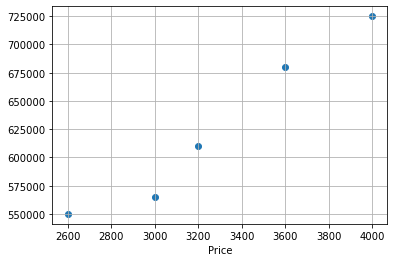

In [21]:
plt.scatter(df['Area(sqft)'],df['Price'])
plt.xlabel('Area')
plt.xlabel('Price')
plt.grid()
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression

In [15]:
m1 = LinearRegression()
m1.fit(x,y)

# model.fit() - It trains the ML model on the training data(x,y)

LinearRegression()

In [16]:
# R2-score
print('Model Score',m1.score(x,y))

Model Score 0.9584301138199486


In [17]:
ypred_m1 = m1.predict(x)
ypred_m1

# model.predict() - ML model trained on training data can be used to make predictions for the test data

array([533664.38356164, 587979.45205479, 615136.98630137, 669452.05479452,
       723767.12328767])

In [18]:
df['Price_pred'] = ypred_m1
df.head()

,Area(sqft),Price,Price_pred
0,2600,550000,533664.383562
1,3000,565000,587979.452055
2,3200,610000,615136.986301
3,3600,680000,669452.054795
4,4000,725000,723767.123288


In [22]:
# ypred = mx + c
m = m1.coef_
c = m1.intercept_
print('Coefficient',m)
print('Intercept',c)

Coefficient [135.78767123]
Intercept 180616.43835616432


In [23]:
df['Price_pred_eqn'] = df['Area(sqft)']*m + c
df.head()

,Area(sqft),Price,Price_pred,Price_pred_eqn
0,2600,550000,533664.383562,533664.383562
1,3000,565000,587979.452055,587979.452055
2,3200,610000,615136.986301,615136.986301
3,3600,680000,669452.054795,669452.054795
4,4000,725000,723767.123288,723767.123288


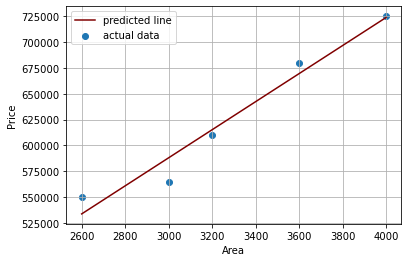

In [26]:
plt.scatter(df['Area(sqft)'],df['Price'],label='actual data')
plt.plot(df['Area(sqft)'],df['Price_pred'],label='predicted line',color='maroon')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [30]:
def gen_metrics(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.mean(mean_squared_error(ytest,ypred))
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MAE',mse)
    print('RMSE',rmse)
    print('R2_Score',r2s)

In [32]:
gen_metrics(y,ypred_m1)
print('Model Score',m1.score(x,y))

MAE 11246.57534246575
MAE 186815068.4931509
RMSE 186815068.4931509
R2_Score 0.9584301138199486
Model Score 0.9584301138199486


In [ ]:
# Q) Find the predicted price of the house when the area(sqft) is
# a) 2800
# b) 4350

In [33]:
ypred_2800_m1 = m1.predict([[2800]])
ypred_2800_m2 = 2800*m + c
print(ypred_2800_m1)
print(ypred_2800_m2)

[560821.91780822]
[560821.91780822]


In [34]:
ypred_4350_m1 = m1.predict([[4350]])
ypred_4350_m2 = 4350*m + c
print(ypred_4350_m1)
print(ypred_4350_m2)

[771292.80821918]
[771292.80821918]


### Multiple Linear Regression

There will be multiple independent variable and 1 dependent variable<br>

In [35]:
df1 = pd.read_csv('house_price2.csv')
df1.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


#### Problem Statement - Based on Area, Bedrooms, Age, Predict the price of the House

In [38]:
df1.shape
# 6 rows, 4 cols

(6, 4)

In [39]:
df1.isnull().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [41]:
br_mean = df1['bedrooms'].mean()
br_med =  df1['bedrooms'].median()
print('Mean',br_mean)
print('Median',br_med)

Mean 4.2
Median 4.0


In [42]:
df1['bedrooms'].fillna(br_med,inplace=True)

In [43]:
df1.isnull().sum()

area        0
bedrooms    0
age         0
price       0
dtype: int64

In [47]:
x1 = df1[['area','bedrooms','age']]  # df.iloc[:,:-1]
y1 = df1['price']                    # df.iloc[:,-1]
print(type(x1))
print(type(y1))
print(x1.shape)
print(y1.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(6, 3)
(6,)


In [48]:
m2 = LinearRegression()
m2.fit(x1,y1)

LinearRegression()

In [50]:
# R2 score
print('Model Score',m2.score(x1,y1))

Model Score 0.9550196399325818


In [51]:
ypred_m2 = m2.predict(x1)
print(ypred_m2)

[518217.63297611 602590.07937407 615307.4140366  597962.89583192
 760663.42675457 795258.55102673]


In [52]:
gen_metrics(y,ypred_m2)

MAE 15507.93866572012
MAE 446305128.22449404
RMSE 446305128.22449404
R2_Score 0.9550196399325818


In [55]:
df1['Price_pred'] = ypred_m2
df1.head()

,area,bedrooms,age,price,Price_pred
0,2600,3.0,20,550000,518217.632976
1,3000,4.0,15,565000,602590.079374
2,3200,4.0,18,610000,615307.414037
3,3600,3.0,30,595000,597962.895832
4,4000,5.0,8,760000,760663.426755


In [57]:
# ypred = m1x1+ m2x2 + m3x3 + c
m = m2.coef_
c = m2.intercept_
print('Coef',m)
print('Intrecept',c)

Coef [  112.06244194 23388.88007794 -3231.71790863]
Intrecept 221323.00186540443


In [58]:
df1['price_pred_eqn'] = df1['area']*m[0] + df1['bedrooms']*m[1] + df1['age']*m[2] + c
df1.head()

,area,bedrooms,age,price,Price_pred,price_pred_eqn
0,2600,3.0,20,550000,518217.632976,518217.632976
1,3000,4.0,15,565000,602590.079374,602590.079374
2,3200,4.0,18,610000,615307.414037,615307.414037
3,3600,3.0,30,595000,597962.895832,597962.895832
4,4000,5.0,8,760000,760663.426755,760663.426755


In [54]:
### What is the predicted value of Price when
# 1) area = 4350, bedrooms=5, age=7

In [59]:
price_pred_m1 = m2.predict([[4350,5,7]])
price_pred_m2 = 4350*m[0] + 5*m[1] + 7*m[2] + c
print(price_pred_m1)
print(price_pred_m2)

[803116.99934295]
803116.9993429547
